In [25]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_excel("/Users/mshari/Documents/Diabetes Prediction and Performance Evaluation Usi/diabetes.data.xls")

In [27]:
input_data = data.iloc[:,0:8].values
output_data = data.iloc[:,8].values

In [28]:
model = Sequential()
model.add(Dense(12,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


/Users/mshari/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(loss = 'binary_crossentropy',optimizer= 'adam', metrics=['accuracy'])

In [30]:
model.fit( input_data , output_data ,epochs=150,batch_size=15)

Epoch 1/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - accuracy: 0.6533 - loss: 6.4225 
Epoch 2/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.6396 - loss: 2.3948
Epoch 3/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.6086 - loss: 1.1913
Epoch 4/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.6534 - loss: 0.7892
Epoch 5/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.6224 - loss: 0.7306
Epoch 6/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.6417 - loss: 0.7024
Epoch 7/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.6537 - loss: 0.6727
Epoch 8/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.6478 - loss: 0.6696
Epoch 9/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.6551 - loss: 0.6581
Epoch 10/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.6419 - loss: 0.6487
Epoch 11/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.6786 - loss: 0.6211
Epoch 12/150
52/52 ━━━━━━━━━━━━━━━━━━━━ 

In [31]:
accuracy= model.evaluate(input_data,output_data,verbose=0)
print("accuracy %.2f %%  :"%(accuracy [1]*100))

accuracy 73.92 %  :


In [32]:
predictions = (model.predict(input_data) > 0.5).astype(int)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step


In [33]:
result = accuracy_score(output_data, predictions)
print("Accuracy Score: %.2f%%" % (result * 100))

Accuracy Score: 73.92%


In [34]:
result = confusion_matrix(output_data, predictions)
print(result)

[[469  31]
 [169  98]]


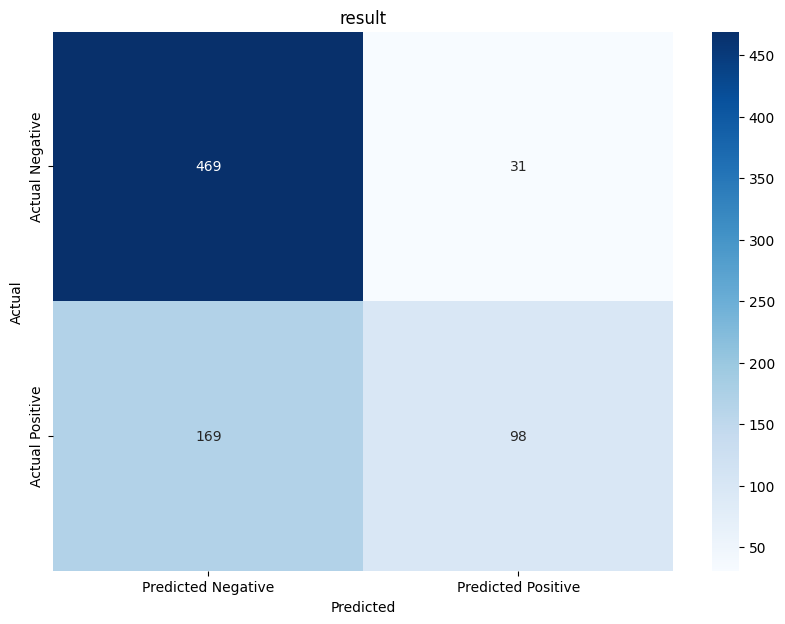

In [35]:
plt.figure(figsize=(10, 7))
sns.heatmap(result, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('result')
plt.show()

In [36]:
comparison_df = pd.DataFrame({'Actual': output_data, 'Predicted': predictions.flatten()})

In [37]:
print("Actual vs Predicted values:")
print(comparison_df)

Actual vs Predicted values:
     Actual  Predicted
0         0          0
1         1          1
2         0          0
3         1          1
4         0          0
..      ...        ...
762       0          1
763       0          0
764       0          0
765       1          1
766       0          0

[767 rows x 2 columns]
